# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
#remove duplicates in list source: https://www.geeksforgeeks.org/python-difference-of-two-lists-including-duplicates/
from collections import Counter 

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#cities_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [20]:
#look at dataset 
#cities_df=pd.read_csv(cities_file)
#cities_df.head()

## Generate Cities List

In [21]:
# structure for a API Call : http//api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
url="http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url=f"{url}appid={api_key}&units={units}&q="

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
#testing with smaller list
#cities=['London', 'Paris']
cities=cities

#empty lists to hold response info
lat=[]
lon=[]
cloudiness= []
country= []
temp=[]
date=[]
humidity=[]
temp=[]
wind_speed= []
city_id=[]
max_temp=[]

#cities that do not pull
bad_cities=[]

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_id.append(response['weather'][0]['id'])
        print(f"Yay!{city} with an ID of {response['weather'][0]['id']} was found.")
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        max_temp.append(response['main']['temp_max'])

    except KeyError:
        print(f"Opps!We could not find {city}.")
        if city not in bad_cities:
            bad_cities.append(city)
#print(f"The latitude information received is: {lat}")
#print(f"The longitude information received is: {lon}")
#print(f"The temperature information received is: {temp}") 
#print(f"The cloudiness information received is: {cloudiness}") 
#print(f"The country information received is: {country}") 
#print(f"The date information received is: {date}") 
#print(f"The humidity information received is: {humidity}") 
#print(f"The wind speed information received is: {wind_speed}") 



Yay!thompson with an ID of 600 was found.
Yay!hobart with an ID of 801 was found.
Opps!We could not find sentyabrskiy.
Yay!port lincoln with an ID of 802 was found.
Yay!isangel with an ID of 802 was found.
Opps!We could not find amderma.
Yay!mataura with an ID of 803 was found.
Yay!mahebourg with an ID of 802 was found.
Opps!We could not find taolanaro.
Yay!rikitea with an ID of 801 was found.
Yay!vaini with an ID of 803 was found.
Yay!hermanus with an ID of 800 was found.
Yay!tonantins with an ID of 802 was found.
Yay!albany with an ID of 801 was found.
Yay!busselton with an ID of 800 was found.
Yay!bredasdorp with an ID of 800 was found.
Yay!la ronge with an ID of 803 was found.
Yay!esperance with an ID of 800 was found.
Yay!sitka with an ID of 803 was found.
Yay!santa luzia with an ID of 800 was found.
Yay!kapaa with an ID of 500 was found.
Yay!banikoara with an ID of 800 was found.
Yay!port alfred with an ID of 800 was found.
Opps!We could not find belushya guba.
Yay!wilmington wit

Yay!siavonga with an ID of 804 was found.
Yay!ponta do sol with an ID of 803 was found.
Yay!egvekinot with an ID of 800 was found.
Opps!We could not find uk.
Yay!mount isa with an ID of 803 was found.
Yay!derzhavinsk with an ID of 804 was found.
Yay!guane with an ID of 802 was found.
Opps!We could not find vaitupu.
Yay!klaksvik with an ID of 300 was found.
Yay!chakwal with an ID of 800 was found.
Yay!mehamn with an ID of 600 was found.
Yay!kudahuvadhoo with an ID of 802 was found.
Yay!storforshei with an ID of 801 was found.
Opps!We could not find mys shmidta.
Yay!luanda with an ID of 803 was found.
Yay!mnogovershinnyy with an ID of 804 was found.
Yay!saryg-sep with an ID of 801 was found.
Yay!namatanai with an ID of 804 was found.
Yay!finnsnes with an ID of 804 was found.
Yay!ulaangom with an ID of 800 was found.
Yay!eureka with an ID of 804 was found.
Yay!fare with an ID of 802 was found.
Yay!blankenberge with an ID of 803 was found.
Yay!novikovo with an ID of 501 was found.
Yay!walv

Yay!sovetskiy with an ID of 600 was found.
Yay!sambava with an ID of 800 was found.
Yay!manavalakurichi with an ID of 701 was found.
Opps!We could not find karaul.
Yay!ternate with an ID of 804 was found.
Yay!sesimbra with an ID of 803 was found.
Yay!cap malheureux with an ID of 800 was found.
Yay!marzuq with an ID of 800 was found.
Yay!vershino-darasunskiy with an ID of 802 was found.
Yay!gobabis with an ID of 804 was found.
Yay!itarema with an ID of 804 was found.
Yay!mata grande with an ID of 804 was found.
Yay!brenes with an ID of 800 was found.
Yay!kaitangata with an ID of 803 was found.
Yay!bobcaygeon with an ID of 800 was found.
Yay!lithakia with an ID of 801 was found.
Yay!danes with an ID of 803 was found.
Yay!basay with an ID of 803 was found.
Yay!broken hill with an ID of 803 was found.
Yay!radhan with an ID of 800 was found.
Yay!pilar with an ID of 802 was found.
Yay!alice with an ID of 800 was found.
Yay!half moon bay with an ID of 804 was found.
Yay!cozumel with an ID of 

Yay!along with an ID of 800 was found.
Yay!triesen with an ID of 500 was found.
Yay!moengo with an ID of 804 was found.
Opps!We could not find naolinco.
Yay!jalu with an ID of 800 was found.
Yay!petropavlovsk-kamchatskiy with an ID of 804 was found.
Yay!khipro with an ID of 800 was found.
Yay!fort-shevchenko with an ID of 803 was found.
Yay!aguimes with an ID of 803 was found.
Yay!jaca with an ID of 804 was found.
Yay!farah with an ID of 803 was found.
Yay!elat with an ID of 800 was found.
Yay!emba with an ID of 802 was found.
Yay!algeciras with an ID of 804 was found.
Yay!karratha with an ID of 804 was found.
Yay!butler with an ID of 600 was found.
Yay!asfi with an ID of 803 was found.
Opps!We could not find ketchenery.
Opps!We could not find artyk.


In [24]:
#clean up cities list to get to 541

reduced_cities=list((Counter(cities) - Counter(bad_cities)).elements())
len(reduced_cities)


563

In [25]:
#create a dataframe from the lists I created above
#"City ID": city_id,
#"City": cites,


weather_dict= {
    "City ID": city_id,
    "City": reduced_cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Long": lon,
    "Temp": temp,
    "Wind Speed": wind_speed,
    "Max Temp": max_temp
}

weather_df=pd.DataFrame(weather_dict)




### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
weather_df.to_csv(r'../Outputs/weather_output.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
#  Get the indices of cities that have humidity over 100%.
humidity_high = weather_df[weather_df['Humidity']>100].index.tolist() 
print(humidity_high)
print("Guess what? You have no humdity over 100! Phew!")

[]
Guess what? You have no humdity over 100! Phew!


In [29]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

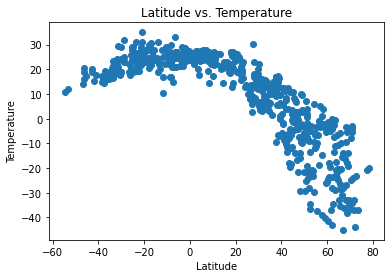

This plot is analyzing how temperatures changes as you move from the south pole to the the north pole.The hightest temperatures are found closer to 0 or the equator.


In [30]:
x_values=weather_df['Lat']
y_values=weather_df['Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature')
plt.show()
print('This plot is analyzing how temperatures changes as you move from the south pole to the the north pole.The hightest temperatures are found closer to 0 or the equator.')

## Latitude vs. Humidity Plot

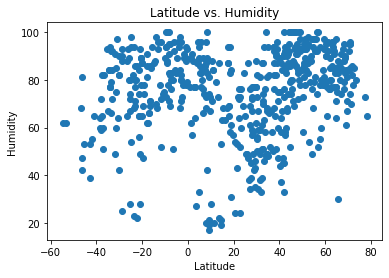

This plot is analyzing how humdity changes as you move from the south pole to the the north pole.I assumed the plot would be similar to that of temperature above but it very different, more spread out.


In [31]:
x_values=weather_df['Lat']
y_values=weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
plt.show()
print('This plot is analyzing how humdity changes as you move from the south pole to the the north pole.I assumed the plot would be similar to that of temperature above but it very different, more spread out.')

## Latitude vs. Cloudiness Plot

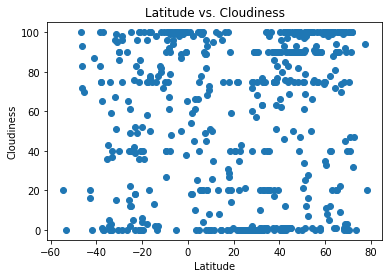

This plot is analysing how cloudiness changes as you move from the south pole to the the north pole. This Data is very spreadout with some grouping. Would be interesting to layover a map to see what countries these are and what elevation they are at.


In [32]:
x_values=weather_df['Lat']
y_values=weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.show()
print('This plot is analysing how cloudiness changes as you move from the south pole to the the north pole. This Data is very spreadout with some grouping. Would be interesting to layover a map to see what countries these are and what elevation they are at.')

## Latitude vs. Wind Speed Plot

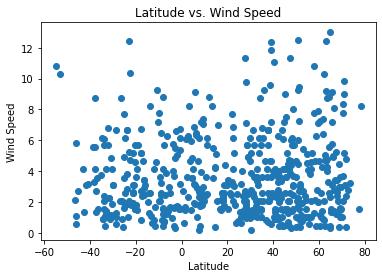

This plot is analyzing how wind speed changes as you move from the south pole to the the north pole.There are some outliers, I would want to compare the rest of these particular countries data to see what else they have in common.


In [33]:
x_values=weather_df['Lat']
y_values=weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.show()
print('This plot is analyzing how wind speed changes as you move from the south pole to the the north pole.There are some outliers, I would want to compare the rest of these particular countries data to see what else they have in common.')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [34]:
#look at total dataframe and use loc to 

north = weather_df.loc[weather_df["Lat"] >= 0]
north_df = pd.DataFrame(north)

south = weather_df.loc[weather_df["Lat"] < 0]
south_df = pd.DataFrame(south)

In [35]:
north_df.head(3)

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Long,Temp,Wind Speed,Max Temp
0,600,thompson,90,CA,1612051484,92,55.7435,-97.8558,-10.00,1.03,-10.00
10,801,albany,12,US,1612051100,58,42.6001,-73.9662,-8.47,4.02,-8.33
13,803,la ronge,76,CA,1612051367,79,55.1001,-105.2842,-11.00,1.03,-11.00


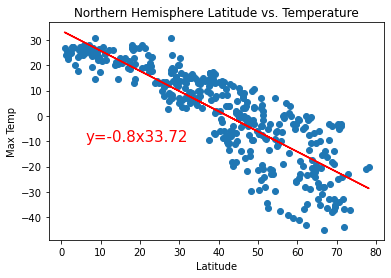

This map shows only the northern hemisphere locations and how max temp is highest at the equator and deacreases as you move away.


In [36]:
north_x_values=north_df['Lat']
north_y_values=north_df['Max Temp']
plt.scatter(north_x_values,north_y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere Latitude vs. Temperature')


#add linear regression

(slope,intercept,rvalue,pvalue,stderr) =linregress (north_x_values,north_y_values)
regress_values = north_x_values*slope +intercept
line_eq="y=" + str(round(slope,2)) +"x" + str(round(intercept,2))

plt.plot(north_x_values,regress_values, "r")
plt.annotate(line_eq,(6,-10), fontsize=15,color="red")

plt.show()

print('This map shows only the northern hemisphere locations and how max temp is highest at the equator and deacreases as you move away.')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

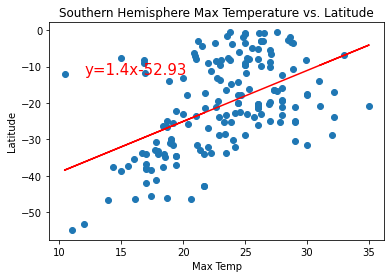

This map shows only the southern hemisphere locations and how max temp is highest at the equator similar to the northern hemisphere plot.


In [37]:
south_x_values=south_df['Max Temp']
south_y_values=south_df['Lat']
plt.scatter(south_x_values,south_y_values)
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere Max Temperature vs. Latitude')


(slope,intercept,rvalue,pvalue,stderr) =linregress (south_x_values,south_y_values)
regress_values = south_x_values*slope +intercept
line_eq="y=" + str(round(slope,2)) +"x" + str(round(intercept,2))

plt.plot(south_x_values,regress_values, "r")
plt.annotate(line_eq,(12,-12),fontsize=15,color="red")

plt.show()
print('This map shows only the southern hemisphere locations and how max temp is highest at the equator similar to the northern hemisphere plot.')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

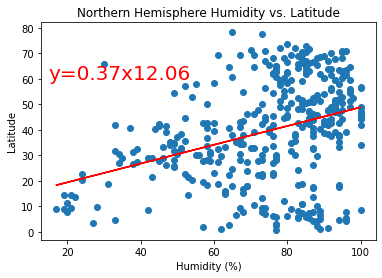

This map shows only the northern hemisphere locations and how humidity is affected as you move further north. A high concentration of humid locations are around lat 30-50.


In [38]:
north_x_values=north_df['Humidity']
north_y_values=north_df['Lat']
plt.scatter(north_x_values,north_y_values)
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere Humidity vs. Latitude')

(slope,intercept,rvalue,pvalue,stderr) =linregress (north_x_values,north_y_values)
regress_values = north_x_values*slope +intercept
line_eq="y=" + str(round(slope,2)) +"x" + str(round(intercept,2))

plt.plot(north_x_values,regress_values, "r")
plt.annotate(line_eq,(15,60), fontsize=20,color="red")

plt.show()

#Print(add a sentence here)
print('This map shows only the northern hemisphere locations and how humidity is affected as you move further north. A high concentration of humid locations are around lat 30-50.')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

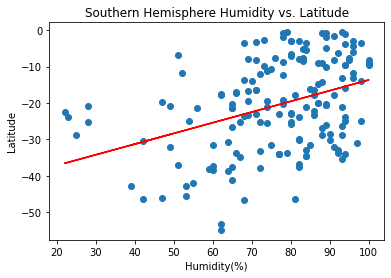

This map shows only the southern hemisphere locations and how humidity is highest closer to the equator.


In [39]:
south_x_values=south_df['Humidity']
south_y_values=south_df['Lat']
plt.scatter(south_x_values,south_y_values)
plt.xlabel('Humidity(%)')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere Humidity vs. Latitude')


(slope,intercept,rvalue,pvalue,stderr) =linregress (south_x_values,south_y_values)
regress_values = south_x_values*slope +intercept
line_eq="y=" + str(round(slope,2)) +"x" + str(round(intercept,2))

plt.plot(south_x_values,regress_values, "r")
plt.annotate(line_eq,(10,-12),fontsize=15,color="red")

plt.show()

#Print(add a sentence here)
print('This map shows only the southern hemisphere locations and how humidity is highest closer to the equator.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

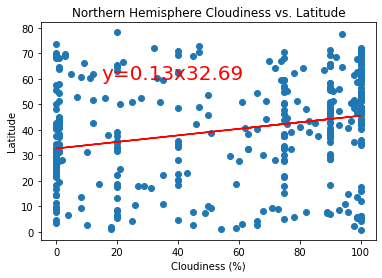

This map shows only the northern hemishere locations and how cloudiness has no visible pattern. However, there is a cluster between lat 35-70 that has high cloudiness.


In [40]:
north_x_values=north_df['Cloudiness']
north_y_values=north_df['Lat']
plt.scatter(north_x_values,north_y_values)
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere Cloudiness vs. Latitude')


(slope,intercept,rvalue,pvalue,stderr) =linregress (north_x_values,north_y_values)
regress_values = north_x_values*slope +intercept
line_eq="y=" + str(round(slope,2)) +"x" + str(round(intercept,2))

plt.plot(north_x_values,regress_values, "r")
plt.annotate(line_eq,(15,60), fontsize=20,color="red")

plt.show()
#Print(add a sentence here)
print('This map shows only the northern hemishere locations and how cloudiness has no visible pattern. However, there is a cluster between lat 35-70 that has high cloudiness.')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

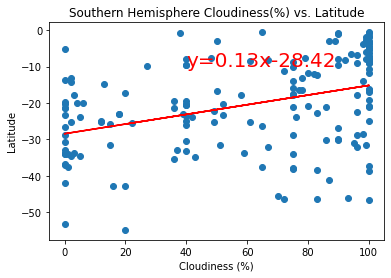

This map shows only the southern hemisphere locations and how cloudiness is highest at the equator.


In [41]:
south_x_values=south_df['Cloudiness']
south_y_values=south_df['Lat']
plt.scatter(south_x_values,south_y_values)
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere Cloudiness(%) vs. Latitude')

(slope,intercept,rvalue,pvalue,stderr) =linregress (south_x_values,south_y_values)
regress_values = south_x_values*slope +intercept
line_eq="y=" + str(round(slope,2)) +"x" + str(round(intercept,2))

plt.plot(south_x_values,regress_values, "r")
plt.annotate(line_eq,(40,-10), fontsize=20,color="red")

plt.show()
#Print(add a sentence here)
print('This map shows only the southern hemisphere locations and how cloudiness is highest at the equator.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

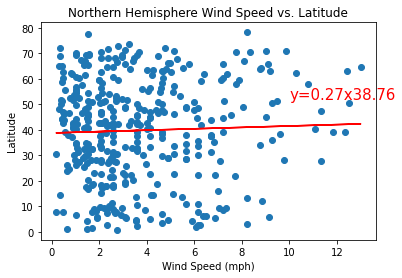

This map shows only the northern hemishere locations and how wind speed and latitude are associated. I would be interested what else is contributing to the locations with higher than 8mph wind.


In [42]:
north_x_values=north_df['Wind Speed']
north_y_values=north_df['Lat']
plt.scatter(north_x_values,north_y_values)
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere Wind Speed vs. Latitude')

(slope,intercept,rvalue,pvalue,stderr) =linregress (north_x_values,north_y_values)
regress_values = north_x_values*slope +intercept
line_eq="y=" + str(round(slope,2)) +"x" + str(round(intercept,2))

plt.plot(north_x_values,regress_values, "r")
plt.annotate(line_eq,(10,52), fontsize=15,color="red")

plt.show()

#Print(add a sentence here)
print('This map shows only the northern hemishere locations and how wind speed and latitude are associated. I would be interested what else is contributing to the locations with higher than 8mph wind.')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

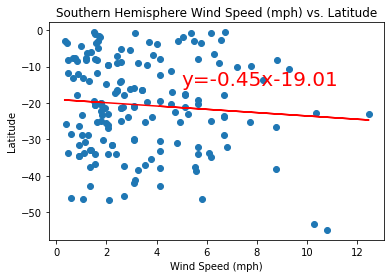

This map shows only the southern hemisphere locations and how wind speed is affected as you move south.I did not expect the high wind speeds near -20 lat.


In [43]:
south_x_values=south_df['Wind Speed']
south_y_values=south_df['Lat']
plt.scatter(south_x_values,south_y_values)
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere Wind Speed (mph) vs. Latitude')


(slope,intercept,rvalue,pvalue,stderr) =linregress (south_x_values,south_y_values)
regress_values = south_x_values*slope +intercept
line_eq="y=" + str(round(slope,2)) +"x" + str(round(intercept,2))

plt.plot(south_x_values,regress_values, "r")
plt.annotate(line_eq,(5,-15), fontsize=20,color="red")

plt.show()
#Print(add a sentence here)
print('This map shows only the southern hemisphere locations and how wind speed is affected as you move south.I did not expect the high wind speeds near -20 lat.')